Dataset available at: "https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset"

## Tasks:-

Given two dataset one contain all the fake news with associated title, text and subject and another dataset contail all real news associated with
title, text and subject.
Task is to use this dataset to build a model which can classify whether the news id real or fake

In [ ]:
## importing modules
import pandas as pd
import numpy as np

In [ ]:
# reading fake-news csv file
fake_df = pd.read_csv("/content/drive/MyDrive/Datasets/Fake-True News/Fake.csv")
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
# view one text of any random index
fake_df['text'][5]

'The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Williams shared a graphic photo of her son, lying in a hospital bed with a beaten and fractured face, on Facebook. It needs to be shared far and wide, because this is unacceptable.It is unclear why Williams  son was in police custody or what sort of altercation resulted in his arrest, but when you see the photo you will realize that these details matter not. Cops are not supposed to beat and brutalize those in their custody. In the post you are about to see, Ms. Williams expresses her hope that the cops had their body cameras on while they were beating her son, but I think we all know that there will be some kind of convenient  malfunction  to explain away the lack of existence of dash or body camera footage of what was clearly a brutal beating. Hell, it could even be described as attempted murde

In [ ]:
# take a very quick info about the dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
# checking for null values
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
## adding a target column, fake means 0 and real means 1
# we have fak_df so we add target as 0
fake_df['target'] = 0
fake_df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
## reading the real news csv file
true_df = pd.read_csv("/content/drive/MyDrive/Datasets/Fake-True News/True.csv")
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
# views on text sample from random index
true_df['text'][5]

'WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be followed up with a weekend of strategy sessions for Trump, McCon

In [ ]:
# checking for null values
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
## now we add 1 to target column to true_df dataset
true_df['target'] = 1
true_df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
## concatenate two dataframes into one
news_df = pd.concat([fake_df,true_df])
news_df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
# shuffle the dataframe
news_df = news_df.sample(frac=1)
news_df.reset_index(inplace=True)

In [ ]:
news_df["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
# viewing text from a random index
news_df['text'][3]

'(Reuters) - A pastor from Idaho who was among five American prisoners released by Iran over the weekend will return to the United States on Thursday from Germany, his wife said on Wednesday. “Saeed will be landing on American soil Thursday evening,” Naghmeh Abedini said in a Facebook posting.  Saeed Abedini, 35, a naturalized U.S. citizen, was detained in 2012. He was sentenced to eight years in prison in 2013 after being accused of harming Iran’s national security by setting up home-based churches in his native country. “He will spend a few days with his parents and then the kids and I will join him on Monday,” his wife said. The couple have two young children. The Americans’ release coincided with the implementation of a nuclear deal under which international economic sanctions against Iran were lifted in return for curbs on Iran’s atomic program. The White House offered clemency to seven Iranians who were convicted or facing trial in the United States. Abedini, along with Washingto

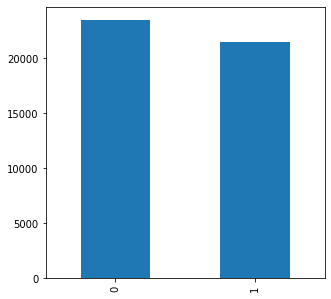

In [ ]:
## visualize data distributions between two classes(true and false)
import matplotlib.pyplot as plt

news_df['target'].value_counts().plot(kind='bar', figsize = (5,5));

True news have a little less amount of data compared to Fake news.
But, that's not a problem as generally we have almost equal amount of data for both classes which means data is perfectly balanced

In [ ]:
## let's visualize some news with title and target whether it is fake or real
import random
def view_random_news(df,no_of_news=5):
  for i in range(no_of_news):
    random_index = random.randint(0, len(news_df))
    title = df['title'][random_index]
    news = df['text'][random_index]
    target = df['target'][random_index]
    print(f"Title: {title}","(Real News)" if target==1 else "(Fake News)\n")
    print(f"\n{news}\n")
    print("-----------------------------\n")


In [ ]:
view_random_news(news_df)

Title: U.S. to stage drill with three carriers as Trump visits Asia (Real News)

WASHINGTON (Reuters) - Three U.S. aircraft carrier strike groups will exercise together in the Western Pacific in the coming days in a rare show of force as President Donald Trump visits Asia with warnings about the nuclear threat from North Korea, U.S. officials say. The drill will include the USS Nimitz, the Ronald Reagan, the Theodore Roosevelt and their accompanying warships, the first time three U.S. aircraft carrier strike groups have exercised together in the region in a decade. A Japanese destroyer, the Inazuma, will join the armada, two Japanese government officials said, following a separate three-day exercise with the Reagan and two Indian warships in the Sea of Japan that ended Monday.    U.S. officials have previously said the drill was under consideration and that planning was under way. The decision to soon go forward with the exercise in the Western Pacific has not been previously published

In [ ]:
#split the dataset into train_test
X = news_df.drop(columns =['target'])
y = news_df['target']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

## First we build a model taking only the title column

In [ ]:
# taking only title column from training set
X_train_title = X_train["title"]
X_train_title

12261     Spice Company Owner Causes Family Feud When H...
16328    Madrid representative in Catalonia apologizes ...
21015    TRUMP’S UN AMBASSADOR Nikki Haley Warns UN Mem...
13362    Senate Judiciary committee wants Donald Trump ...
23597    Argentina says Russia wants more Argentine foo...
                               ...                        
24981    U.S. House panel to take up bill to spur gener...
28943    Trump campaign aide met Russian officials in 2...
14711    ARMY THREATENS GREEN BERET WAR HERO WITH COURT...
6298     Japan business lobby throws weight behind PM A...
24833    Puerto Rico evacuates area near crumbling dam,...
Name: title, Length: 35918, dtype: object

In [ ]:
# taking only title column from test set
X_test_title = X_test['title']
X_test_title

33441    Leaders of Venezuela's bruised opposition to t...
7049     In Trump We Trust: Inauguration prompts celebr...
19191     Story Of Severely Disabled Man And His Mom Sh...
20087    Justice Department names new acting head of dr...
2203     Sweden, Britain seek U.N. meeting on situation...
                               ...                        
14548    U.S. lawmakers seek temporarily extension to i...
44797    STEVIE WONDER SLAMS Black Lives Matter At MN P...
14873    Russia to U.S., Trump: Sort out your own pre-e...
12002    Australia arrests man accused of trying to sel...
24364    Police arrest woman in Tanzania over video of ...
Name: title, Length: 8980, dtype: object

## Model_0 getting baseline score

First, we try to build a baseline_model using naive_bayes and see how it
performs, and then we dive into deep learning model, to beat the baseline score  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create a pipeline
model_0 = Pipeline([
  ("tf-idf",TfidfVectorizer()),
  ("clf",MultinomialNB())
])

# fit the pipeline to the training data
model_0.fit(X = X_train_title.to_list(),
            y = y_train.to_list())

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X_test_title.to_list(),
              y_test.to_list())

0.9407572383073497

Well, the baseline model learnt pretty well though. But, we considering only the title columns. Let's build a model
in deep learning and see how it performs on only title column

## Deep-Learning Model_1


In [ ]:
## Converting text into numbers
##Text Vectorization//Tokenization

from tensorflow.keras.layers import TextVectorization

max_vocab_length_title = 20000
max_length = 12

title_vectorizer = TextVectorization(max_tokens=max_vocab_length_title,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
## let's visualize top and bottom 10 words
title_vectorizer.adapt(X_train_title)
vocab_words = title_vectorizer.get_vocabulary()
top_10_words = vocab_words[:10]
bottom_10_words = vocab_words[-10:]
print(f"Top 10 common words: {top_10_words}")
print(f"Top 10 least common words: {bottom_10_words}")

Top 10 common words: ['', '[UNK]', 'to', 'trump', 'in', 'video', 'of', 'for', 'on', 'the']
Top 10 least common words: ['usiran', 'usher', 'ushas', 'usga', 'user’', 'useless”', 'useless’', 'usdefense', 'uscanada', 'usbritish']


## Creating an Embedding layer

In [ ]:
#set the see
import tensorflow as tf

tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length_title,
                                      output_dim = 150,
                                      embeddings_initializer = 'uniform',
                                      input_length = max_length,
                                      name = 'embedding_1')
inputs = tf.keras.layers.Input(shape=(1,), dtype = "string")
x = title_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(64)(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs,outputs, name = "model_1_dense")

#compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 12)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 12, 150)           3000000   
                                                                 
 lstm (LSTM)                 (None, 64)                55040     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 3,055,105
Trainable params: 3,055,105
Non-trainable params: 0
___________________________________________

In [ ]:
model_1_history = model_1.fit(X_train_title,
                              y_train,
                              epochs = 5,
                              validation_data = (X_test_title,y_test))

Epoch 1/5
1123/1123 [==============================] - 53s 45ms/step - loss: 0.1315 - accuracy: 0.9499 - val_loss: 0.0920 - val_accuracy: 0.9682
Epoch 2/5
1123/1123 [==============================] - 64s 57ms/step - loss: 0.0418 - accuracy: 0.9857 - val_loss: 0.1077 - val_accuracy: 0.9670
Epoch 3/5
1123/1123 [==============================] - 52s 46ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.1123 - val_accuracy: 0.9671
Epoch 4/5
1123/1123 [==============================] - 52s 47ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.1221 - val_accuracy: 0.9673
Epoch 5/5
1123/1123 [==============================] - 50s 45ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.1482 - val_accuracy: 0.9665


In [ ]:
# evaluate the model
model_1.evaluate(X_test_title,
                 y_test)

281/281 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.9665


[0.1481657475233078, 0.96648108959198]

Well, first deep learning model performs really well. But now i build a model considering both text and title column and see how it works

## Model_2 concatenate title and text column

In [ ]:
## creating both text and title dataset
X_train_title = X_train["title"]
X_train_text = X_train["text"]
X_test_text = X_test["text"]
X_test_title = X_test["title"]

In [ ]:
## first calculate average length of a senetence in text column
sent_len = [len(sentence.split()) for sentence in X_train_text.to_list()]
avg_sent_len = np.mean(sent_len)
avg_sent_len # return average sentence length

404.5057631271229

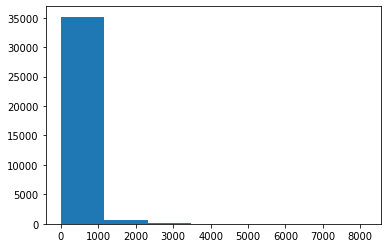

In [ ]:
#check the distribution of sentence length
import matplotlib.pyplot as plt
plt.hist(sent_len, bins=7);

it looks like majority of the sentence length is between 0-1000

In [ ]:
# how much length 95% sentence covers is text column
output_sq_len = int(np.percentile(sent_len,95))
output_sq_len

901

In [ ]:
sent_len_title = [len(sentence.split()) for sentence in X_train_title.to_list()]
avg_sent_len_title = np.mean(sent_len_title)
avg_sent_len_title

12.454730218831784

In [ ]:
# how much length 95% sentence covers in title column
output_sq_len_title = int(np.percentile(sent_len_title,95))
output_sq_len_title

21

In [ ]:
## create text vectorization layer for text
max_tokens = 95000
max_len = 405
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    standardize='lower_and_strip_punctuation',
                                    output_mode = 'int',
                                    output_sequence_length=max_len)

In [ ]:
## create title vectorizer layer for title
max_token_title = 20000
max_len_title = 20

title_vectorizer = TextVectorization(max_tokens = max_token_title,
                                     output_sequence_length=max_len_title)

In [ ]:
## Adapt text vectorizer to text column
text_vectorizer.adapt(X_train_text.to_list())

In [ ]:
# visualize how text_vectorizer lokks like
import random
random_text = random.choice(X_train_text.to_list())
print(f"Text:\n{random_text}")
print(f"\nLength of Text: {len(random_text.split())}")
print(f"\nVectorizer Text: \n {text_vectorizer([random_text])}")

Text:
NAIROBI (Reuters) - Kenya s chief prosecutor has directed the department of criminal investigations and the anti-corruption commission to investigate election board officials over possible offences in the invalidated Aug. 8 presidential vote, he said in a letter. Keriako Tobiko, the director of public prosecutions, also asked the two agencies to examine allegations that two senior opposition officials gained illegal access to servers of the election commission as the poll results were being tallied. The Supreme Court annulled the re-election of President Uhuru Kenyatta on Sept. 1, citing irregularities and illegalities in the transmission of results, and ordered a repeat election within 60 days. In its detailed ruling last Wednesday, the court said it had not found evidence of individual culpability among election board officials, adding the failings were institutional. Tobiko said in the letter seen by Reuters on Sunday that the court not finding individual culpability did not s

In [ ]:
# check most and least common words in our text vocabulary
text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(text_vocab)}")
print(f"Most 10 common words in the vocabulary : {text_vocab[:10]}")
print(f"Most 10 least words in the vocabulary: {text_vocab[-10:]}")

Number of words in vocabulary: 95000
Most 10 common words in the vocabulary : ['', '[UNK]', 'the', 'to', 'of', 'a', 'and', 'in', 'that', 'on']
Most 10 least words in the vocabulary: ['interruptionwell', 'interrupters', 'interrogation10', 'interpretive', 'interpreteriii', 'interpretationshuma', 'interpolnovember', 'interoperable', 'interoffice', 'internviktor']


In [ ]:
## create the text embedding layer

text_embed = tf.keras.layers.Embedding(input_dim=len(text_vocab),
                                       output_dim = 150,
                                       mask_zero = True,
                                       name = "text_embedding")

# visualize what text embedding does
random_sentence = random.choice(X_train_text.to_list())
print(f"Original Sentence- \n{random_sentence}\n")
vectorized_sentence = text_vectorizer([random_sentence])
print(f"Sentence after Vectorization - \n{vectorized_sentence}")
embedded_sentence = text_embed(vectorized_sentence)
print(f"Embedding Vector of the sentence:\n{embedded_sentence}\n")
print("\n")
print("\n")

Original Sentence- 
TORONTO (Reuters) - Canada s indigenous population is growing four times faster than the rest the country, census data showed on Wednesday, marking a dramatic increase in the ranks of people who have long struggled with poverty and marginalization. A growing number of Canadians identifying themselves as indigenous, a higher fertility rate and a higher life expectancy for indigenous people than in the past help explain the rapid growth rate, Statistics Canada said.  Canada s indigenous population grew 42.5 percent in the 10  years to 2016 to 1.7 million people, compared to 11 percent growth for Canada as a whole, Statistics Canada said, in data released from the 2016 census.   The findings show a young population, with an average age of 32.1 years, compared with 40.9 for the non-aboriginal population.  The census, which showed indigenous people accounting for nearly 5 percent of the population overall, also found a younger generation significantly more likely to be r

In [ ]:
# letz adapt the title column using title_vectorizer
title_vectorizer.adapt(X_test_title.to_list())

In [ ]:
# check how many words in our text vocabulary
title_vocabulary = title_vectorizer.get_vocabulary()
print(f"Total number of words in vocabulary: {len(title_vocabulary)}")
print(f"Top 10 common words in the vocabulary : {title_vocabulary[:10]}")
print(f"Top 10 least words in the vocabulary: {title_vocabulary[-10:]}")

Total number of words in vocabulary: 15474
Top 10 common words in the vocabulary : ['', '[UNK]', 'to', 'trump', 'in', 'video', 'of', 'for', 'on', 'the']
Top 10 least words in the vocabulary: ['106yearold', '105', '104yearold', '102', '101m', '1000000', '100000', '025', '02', '0']


In [ ]:
## creating text_inputs and hidden layers
input_text = tf.keras.layers.Input(shape=(1,), dtype = tf.string)
text_vectors = text_vectorizer(input_text)
text_embeddings = text_embed(text_vectors)
x = tf.keras.layers.LSTM(64)(text_embeddings)
x = tf.keras.layers.Flatten()(x)
dense_1 = tf.keras.layers.Dense(128, activation='relu')(x)
dense_2 = tf.keras.layers.Dense(100, activation = 'relu')(dense_1)
drop_out_text = tf.keras.layers.Dropout(0.3)(dense_2)
dense_3 = tf.keras.layers.Dense(128, activation = 'relu')(drop_out_text)
text_model = tf.keras.Model(inputs = input_text,
                            outputs = dense_3)

In [ ]:
## create custom title embedding

title_embed = tf.keras.layers.Embedding(input_dim=len(title_vocabulary),
                                       output_dim = 150,
                                       mask_zero = True,
                                       name = "title_embedding")

#creating text inputs and hidden layers
input_title = tf.keras.layers.Input(shape=(1,), dtype = tf.string)
title_vectors = title_vectorizer(input_title)
title_embeddings = title_embed(title_vectors)
x_title = tf.keras.layers.LSTM(25)(title_embeddings)
dense_1_title = tf.keras.layers.Dense(100, activation = 'relu')(x_title)
drop_out_title = tf.keras.layers.Dropout(0.3)(dense_1_title)
dense_2_title = tf.keras.layers.Dense(128, activation = 'relu')(drop_out_title)
title_model = tf.keras.Model(inputs = input_title,
                             outputs = dense_2_title) 

In [ ]:
# concatenate
concatenate = tf.keras.layers.Concatenate(name = "concatenation")([text_model.output,
                                                                   title_model.output])
concat_dropout = tf.keras.layers.Dropout(0.2)(concatenate)
concat_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(concat_dropout)
concat_dropout = tf.keras.layers.Dropout(0.3)(concat_dense_1)
concat_dense_2 = tf.keras.layers.Dense(128, activation = 'relu')(concat_dropout)
output_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')(concat_dense_2)

## construct the model
model_2 = tf.keras.Model(inputs=[text_model.input,
                                 title_model.input],
                         outputs = output_layer,
                         name = "model_2_text_title")

In [ ]:
model_2.summary()

Model: "model_2_text_title"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 405)         0           ['input_2[0][0]']                
 orization)                                                                                       
                                                                                                  
 text_embedding (Embedding)     (None, 405, 150)     14250000    ['text_vectorization_1[0][0]']   
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []              

In [ ]:
## compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

In [ ]:
## combine text and title dataset
train_text_title = tf.data.Dataset.from_tensor_slices((X_train_text.to_list(),X_train_title.to_list()))
train_y = tf.data.Dataset.from_tensor_slices((y_train))
train_text_title_dataset = tf.data.Dataset.zip((train_text_title, train_y))
train_text_title_dataset = train_text_title_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# repeat same steps for test dataset
test_text_title = tf.data.Dataset.from_tensor_slices((X_test_text.to_list(), X_test_title.to_list()))
test_y = tf.data.Dataset.from_tensor_slices((y_test))
test_text_title_dataset = tf.data.Dataset.zip((test_text_title,test_y))
test_text_title_dataset = test_text_title_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_2_history = model_2.fit(train_text_title_dataset,
                              epochs = 5,
                              steps_per_epoch = int(0.1 * len(train_text_title_dataset)),
                              validation_data = test_text_title_dataset,
                              validation_steps = int(0.1 * len(test_text_title_dataset)))

Epoch 1/5
112/112 [==============================] - 67s 515ms/step - loss: 0.6924 - accuracy: 0.5287 - val_loss: 0.6896 - val_accuracy: 0.5647
Epoch 2/5
112/112 [==============================] - 55s 487ms/step - loss: 0.6907 - accuracy: 0.5371 - val_loss: 0.6872 - val_accuracy: 0.5647
Epoch 3/5
112/112 [==============================] - 58s 518ms/step - loss: 0.6913 - accuracy: 0.5234 - val_loss: 0.6867 - val_accuracy: 0.5647
Epoch 4/5
112/112 [==============================] - 54s 485ms/step - loss: 0.6917 - accuracy: 0.5106 - val_loss: 0.6879 - val_accuracy: 0.5647
Epoch 5/5
112/112 [==============================] - 54s 487ms/step - loss: 0.6912 - accuracy: 0.5092 - val_loss: 0.6878 - val_accuracy: 0.5647


In [ ]:
model_2.evaluate(test_text_title_dataset)

281/281 [==============================] - 28s 100ms/step - loss: 0.6889 - accuracy: 0.5327


[0.6889260411262512, 0.5327394008636475]

Well this model performs poorly even though we consider both text and title column.
However, for embedding layers i created custom embedding layer. For next model
i'm going to use a pretrained embedding layers which learnt on a different dataset.
This time i'm also going to consider the subject columns. Let's see how our next model performs

In [ ]:
import tensorflow_hub as hub
## using pretrained embedding layers
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                 trainable = False,
                                 name = "use_4_encoding")

In [ ]:
## converting subject column to one-hot
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data_encoded = encoder.fit_transform(X_train["subject"].to_numpy())
test_data_encoded = encoder.fit_transform(X_test["subject"].to_numpy())
train_data_encoded.shape, test_data_encoded.shape

((35918,), (8980,))

In [ ]:
# combine label_encoded with text and title for train data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_text, X_train_title,train_data_encoded))
train_text_title_y = tf.data.Dataset.from_tensor_slices((y_train.to_numpy()))
train_text_title_encoded = tf.data.Dataset.zip((train_dataset, train_text_title_y))
train_text_title_encoded = train_text_title_encoded.batch(32).prefetch(tf.data.AUTOTUNE)

# combine label_encoded with text and title for test data
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_text, X_test_title,test_data_encoded))
test_text_title_y = tf.data.Dataset.from_tensor_slices((y_test.to_numpy()))
test_text_title_encoded = tf.data.Dataset.zip((test_dataset, test_text_title_y))
test_text_title_encoded = test_text_title_encoded.batch(32).prefetch(tf.data.AUTOTUNE)
train_text_title_encoded

<PrefetchDataset shapes: (((None,), (None,), (None,)), (None,)), types: ((tf.string, tf.string, tf.int64), tf.int64)>

In [ ]:
test_text_title_encoded

<PrefetchDataset shapes: (((None,), (None,), (None,)), (None,)), types: ((tf.string, tf.string, tf.int64), tf.int64)>

In [ ]:
# creating the model
text_input = tf.keras.layers.Input(shape = [],dtype = tf.string, name= "text_input")
text_embedding = embedding_layer(text_input)
text_dense_1 = tf.keras.layers.Dense(200, activation='relu')(text_embedding)
text_dropout = tf.keras.layers.Dropout(0.5)(text_dense_1)
text_dense_2 = tf.keras.layers.Dense(100, activation = 'relu')(text_dropout)
text_model = tf.keras.Model(inputs = text_input,
                            outputs = text_dense_2)

subject_input = tf.keras.layers.Input(shape =(1,),dtype = tf.int32, name = 'subject_input')
subject_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(subject_input)
subject_dropout = tf.keras.layers.Dropout(0.3)(subject_dense_1)
subject_dense_2 = tf.keras.layers.Dense(100, activation='relu')(subject_dropout)
subject_model = tf.keras.Model(inputs = subject_input,
                               outputs = subject_dense_2)

title_input = tf.keras.layers.Input(shape = [],dtype = tf.string, name = 'title_input')
title_embedding  = embedding_layer(title_input)
title_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(title_embedding)
title_dropout = tf.keras.layers.Dropout(0.3)(title_dense_1)
title_dense_2 = tf.keras.layers.Dense(100, activation = 'relu')(title_dropout)
title_model = tf.keras.Model(inputs = title_input,
                             outputs = title_dense_2)

concatenate = tf.keras.layers.Concatenate(name="concatenation_layer")([text_model.output,
                                                                       title_model.output])
concat_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(concatenate)
concat_drop_out_1 = tf.keras.layers.Dropout(0.5)(concat_dense_1)
concat_dense_2 = tf.keras.layers.Dense(100, activation= 'relu')(concat_drop_out_1)
combined_embeddings = tf.keras.layers.Concatenate(name = "concat_2_layer")([subject_model.output,
                                                                            concat_dense_2])
combined_dense = tf.keras.layers.Dense(100, activation = 'relu')(combined_embeddings)
combined_drop = tf.keras.layers.Dropout(0.3)(combined_dense)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(combined_drop)

In [ ]:
model_3 = tf.keras.Model(inputs =[text_model.input,
                                  title_model.input,
                                  subject_model.input],
                         outputs = output_layer)

In [ ]:
# compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_text_title_encoded,
                              steps_per_epoch = int(0.1 * len(train_text_title_encoded)),
                              epochs = 10,
                              validation_data = (test_text_title_encoded),
                              validation_steps = int(0.1 * len(test_text_title_encoded)))

Epoch 1/10
112/112 [==============================] - 45s 366ms/step - loss: 0.2158 - accuracy: 0.8948 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 2/10
112/112 [==============================] - 43s 381ms/step - loss: 0.0817 - accuracy: 0.9690 - val_loss: 0.0477 - val_accuracy: 0.9810
Epoch 3/10
112/112 [==============================] - 43s 383ms/step - loss: 0.0564 - accuracy: 0.9791 - val_loss: 0.0267 - val_accuracy: 0.9922
Epoch 4/10
112/112 [==============================] - 40s 354ms/step - loss: 0.0554 - accuracy: 0.9782 - val_loss: 0.0197 - val_accuracy: 0.9933
Epoch 5/10
112/112 [==============================] - 42s 375ms/step - loss: 0.0360 - accuracy: 0.9858 - val_loss: 0.0190 - val_accuracy: 0.9911
Epoch 6/10
112/112 [==============================] - 40s 362ms/step - loss: 0.0359 - accuracy: 0.9869 - val_loss: 0.0156 - val_accuracy: 0.9933
Epoch 7/10
112/112 [==============================] - 39s 351ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0146 - val_ac

In [ ]:
model_3.evaluate(test_text_title_encoded)

281/281 [==============================] - 65s 231ms/step - loss: 0.0347 - accuracy: 0.9853


[0.034667301923036575, 0.9853006601333618]

Perfect, model_3 neural network ablse to beat the baseline_score i set up earlier. This happened because of considering one more extra column
and using a pretrained embedding layer whicj also takes care of the of Tokenization.

In [ ]:
history = pd.DataFrame(model_3_history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.215830,0.894810,0.041642,0.987723
1,0.081703,0.969029,0.047691,0.981027
2,0.056374,0.979074,0.026750,0.992188
3,0.055394,0.978237,0.019713,0.993304
4,0.035964,0.985770,0.019010,0.991071
5,0.035908,0.986886,0.015604,0.993304
6,0.035835,0.988560,0.014610,0.993304
7,0.032414,0.989118,0.017435,0.993304
8,0.031876,0.988560,0.010216,0.995536
9,0.032314,0.989118,0.026784,0.992188


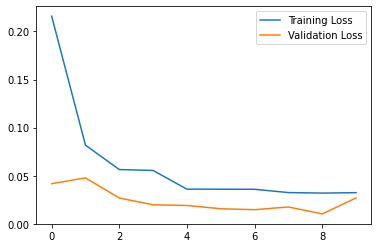

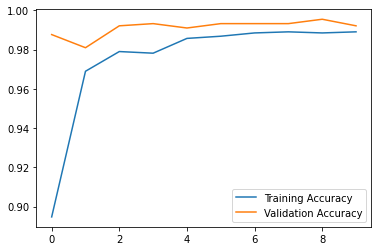

In [ ]:
import matplotlib.pyplot as plt
loss = model_3_history.history['loss']
val_loss = model_3_history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs,loss, label= "Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.legend()
plt.figure()
accuracy = model_3_history.history['accuracy']
val_accuracy = model_3_history.history['val_accuracy']
plt.plot(epochs,accuracy,label = "Training Accuracy")
plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
plt.legend()
plt.show();

Well the graph kinda indicating that model is overfitting. what can be done next is to test this model again but this time i'm going to use
a validation split. Means i divide the entire dataset into 3 parts, Train, Test and Valid. i train the model on training data, validate on validation
data and finally  i test it out on test data. i'll make sure the test data information no way leaked to the model during training.

In [ ]:
## bringing the concatenated dataframe
news_df

,index,title,text,subject,date,target
0,16128,Catalonia's Puigdemont to see lawyers in Bruss...,BRUSSELS (Reuters) - The former head of Catalo...,worldnews,"October 30, 2017",1
1,19125,Iraqi PM orders security services 'to protect ...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,worldnews,"September 25, 2017",1
2,6794,Ted Cruz Threatens Voters: ‘Every Vote For Do...,Republican presidential candidate Ted Cruz mus...,News,"April 20, 2016",0
3,11167,Pastor freed from prison in Iran to return to ...,(Reuters) - A pastor from Idaho who was among ...,politicsNews,"January 20, 2016",1
4,97,Trump on Twitter (Dec 18) - Congressional Race...,The following statements were posted to the ve...,politicsNews,"December 18, 2017",1
...,...,...,...,...,...,...
44893,5740,‘Never Trump’: Another Well-Known GOP Figure ...,Despite some noises being made by some Republi...,News,"June 25, 2016",0
44894,11861,Britain's Brexit rebels offer compromise on la...,LONDON (Reuters) - British MPs who inflicted d...,worldnews,"December 20, 2017",1
44895,13429,HERE’S HOW HILLARY’S VP PICK Has Just Proven H...,Hillary s VP pick is proving himself to be a a...,politics,"Jul 26, 2016",0
44896,6530,Duggar-Linked Ministry Building A ‘Retreat’ W...,It s becoming increasingly clear that when TLC...,News,"May 5, 2016",0


In [ ]:
# dropping the index column
news_df_copy = news_df.drop(columns=["index"])
news_df_copy 

,title,text,subject,date,target
0,Catalonia's Puigdemont to see lawyers in Bruss...,BRUSSELS (Reuters) - The former head of Catalo...,worldnews,"October 30, 2017",1
1,Iraqi PM orders security services 'to protect ...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,worldnews,"September 25, 2017",1
2,Ted Cruz Threatens Voters: ‘Every Vote For Do...,Republican presidential candidate Ted Cruz mus...,News,"April 20, 2016",0
3,Pastor freed from prison in Iran to return to ...,(Reuters) - A pastor from Idaho who was among ...,politicsNews,"January 20, 2016",1
4,Trump on Twitter (Dec 18) - Congressional Race...,The following statements were posted to the ve...,politicsNews,"December 18, 2017",1
...,...,...,...,...,...
44893,‘Never Trump’: Another Well-Known GOP Figure ...,Despite some noises being made by some Republi...,News,"June 25, 2016",0
44894,Britain's Brexit rebels offer compromise on la...,LONDON (Reuters) - British MPs who inflicted d...,worldnews,"December 20, 2017",1
44895,HERE’S HOW HILLARY’S VP PICK Has Just Proven H...,Hillary s VP pick is proving himself to be a a...,politics,"Jul 26, 2016",0
44896,Duggar-Linked Ministry Building A ‘Retreat’ W...,It s becoming increasingly clear that when TLC...,News,"May 5, 2016",0


In [ ]:
train_data = news_df_copy.drop(columns=["target"])
target_data = news_df_copy["target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(train_data, target_data, test_size = 0.4) # taking 40% for validation, later i split the validation in 50% 

In [ ]:
X_valid,X_test,y_valid,y_test = train_test_split(X_valid,y_valid, test_size=0.5)

In [ ]:
## converting subject column to one-hot
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data_encoded = encoder.fit_transform(X_train["subject"].to_numpy())
valid_data_encoded = encoder.fit_transform(X_valid["subject"].to_numpy())
test_data_encoded = encoder.fit_transform(X_test["subject"].to_numpy())
train_data_encoded.shape, valid_data_encoded.shape, test_data_encoded.shape

((26938,), (8980,), (8980,))

In [ ]:
X_train_text = X_train["text"].to_list()
X_train_title = X_train["title"].to_list()
X_valid_text = X_valid["text"].to_list()
X_valid_title = X_valid["title"].to_list()
X_test_text = X_test["text"].to_list()
X_test_title = X_test["title"].to_list()

In [ ]:
# combine label_encoded with text and title for train data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_text, X_train_title,train_data_encoded))
train_text_title_y = tf.data.Dataset.from_tensor_slices((y_train.to_numpy()))
train_text_title_encoded = tf.data.Dataset.zip((train_dataset, train_text_title_y))
train_text_title_encoded = train_text_title_encoded.batch(32).prefetch(tf.data.AUTOTUNE)

# combine label_encoded with text and title for valid data
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_text, X_valid_title,valid_data_encoded))
valid_text_title_y = tf.data.Dataset.from_tensor_slices((y_valid.to_numpy()))
valid_text_title_encoded = tf.data.Dataset.zip((valid_dataset, valid_text_title_y))
valid_text_title_encoded = valid_text_title_encoded.batch(32).prefetch(tf.data.AUTOTUNE)

# combine label_encoded with text and title for test data
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_text, X_test_title,test_data_encoded))
test_text_title_y = tf.data.Dataset.from_tensor_slices((y_test.to_numpy()))
test_text_title_encoded = tf.data.Dataset.zip((test_dataset, test_text_title_y))
test_text_title_encoded = test_text_title_encoded.batch(32).prefetch(tf.data.AUTOTUNE)
train_text_title_encoded,valid_text_title_encoded,test_text_title_encoded

(<PrefetchDataset shapes: (((None,), (None,), (None,)), (None,)), types: ((tf.string, tf.string, tf.int64), tf.int64)>,
 <PrefetchDataset shapes: (((None,), (None,), (None,)), (None,)), types: ((tf.string, tf.string, tf.int64), tf.int64)>,
 <PrefetchDataset shapes: (((None,), (None,), (None,)), (None,)), types: ((tf.string, tf.string, tf.int64), tf.int64)>)

In [ ]:
import tensorflow_hub as hub
## using pretrained embedding layers
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                 trainable = False,
                                 name = "use_4_encoding")

In [ ]:
# creating the model
text_input = tf.keras.layers.Input(shape = [],dtype = tf.string, name= "text_input")
text_embedding = embedding_layer(text_input)
text_dense_1 = tf.keras.layers.Dense(200, activation='relu')(text_embedding)
text_dropout = tf.keras.layers.Dropout(0.5)(text_dense_1)
text_dense_2 = tf.keras.layers.Dense(100, activation = 'relu')(text_dropout)
text_dropout_2 = tf.keras.layers.Dropout(0.3)(text_dense_2)
text_model = tf.keras.Model(inputs = text_input,
                            outputs = text_dropout_2)

subject_input = tf.keras.layers.Input(shape =(1,),dtype = tf.int32, name = 'subject_input')
subject_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(subject_input)
subject_dropout_1 = tf.keras.layers.Dropout(0.3)(subject_dense_1)
subject_dense_2 = tf.keras.layers.Dense(100, activation='relu')(subject_dropout_1)
subject_dropout_2 = tf.keras.layers.Dropout(0.3)(subject_dense_2)
subject_model = tf.keras.Model(inputs = subject_input,
                               outputs = subject_dropout_2)

title_input = tf.keras.layers.Input(shape = [],dtype = tf.string, name = 'title_input')
title_embedding  = embedding_layer(title_input)
title_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(title_embedding)
title_dropout = tf.keras.layers.Dropout(0.3)(title_dense_1)
title_dense_2 = tf.keras.layers.Dense(100, activation = 'relu')(title_dropout)
title_dropout_2 = tf.keras.layers.Dropout(0.5)(title_dense_2)
title_model = tf.keras.Model(inputs = title_input,
                             outputs = title_dropout_2)

concatenate = tf.keras.layers.Concatenate(name="concatenation_layer")([text_model.output,
                                                                       title_model.output])
concat_dense_1 = tf.keras.layers.Dense(200, activation = 'relu')(concatenate)
concat_drop_out_1 = tf.keras.layers.Dropout(0.5)(concat_dense_1)
concat_dense_2 = tf.keras.layers.Dense(100, activation= 'relu')(concat_drop_out_1)
combined_embeddings = tf.keras.layers.Concatenate(name = "concat_2_layer")([subject_model.output,
                                                                            concat_dense_2])
combined_dense = tf.keras.layers.Dense(100, activation = 'relu')(combined_embeddings)
combined_drop = tf.keras.layers.Dropout(0.3)(combined_dense)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(combined_drop)

model_4 = tf.keras.Model(inputs =[text_model.input,
                                  title_model.input,
                                  subject_model.input],
                         outputs = output_layer)

# compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4_history = model_4.fit(train_text_title_encoded,
                              steps_per_epoch = int(0.1 *len(train_text_title_encoded)),
                              epochs = 5,
                              validation_data = (valid_text_title_encoded),
                              validation_steps = int(0.1 * len(valid_text_title_encoded)))

Epoch 1/5
84/84 [==============================] - 30s 313ms/step - loss: 0.3069 - accuracy: 0.8415 - val_loss: 0.0936 - val_accuracy: 0.9654
Epoch 2/5
84/84 [==============================] - 24s 291ms/step - loss: 0.1080 - accuracy: 0.9557 - val_loss: 0.0415 - val_accuracy: 0.9810
Epoch 3/5
84/84 [==============================] - 27s 321ms/step - loss: 0.0783 - accuracy: 0.9736 - val_loss: 0.0466 - val_accuracy: 0.9833
Epoch 4/5
84/84 [==============================] - 27s 325ms/step - loss: 0.0540 - accuracy: 0.9784 - val_loss: 0.0224 - val_accuracy: 0.9911
Epoch 5/5
84/84 [==============================] - 26s 307ms/step - loss: 0.0520 - accuracy: 0.9795 - val_loss: 0.0233 - val_accuracy: 0.9900


In [ ]:
## time to test on test data, the data the model never sees, will see how the model performs 
model_4.evaluate(test_text_title_encoded)

281/281 [==============================] - 62s 221ms/step - loss: 0.0269 - accuracy: 0.9891


[0.026930104941129684, 0.9890868663787842]

well it predicted almost 99% on a dataset that the model never sees before

letz head over to the evaluation of our best so-far model (model_4)

## Evaluation

In [ ]:
preds = model_4.predict(test_text_title_encoded)
preds

array([[9.9992526e-01],
       [9.9970454e-01],
       [9.9768138e-01],
       ...,
       [3.4549832e-04],
       [1.8396232e-06],
       [9.9955589e-01]], dtype=float32)

In [ ]:
preds = np.round(preds)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy score: ",accuracy_score(y_test,preds))

Accuracy score:  0.989086859688196


In [ ]:
cm = confusion_matrix(y_test,preds)

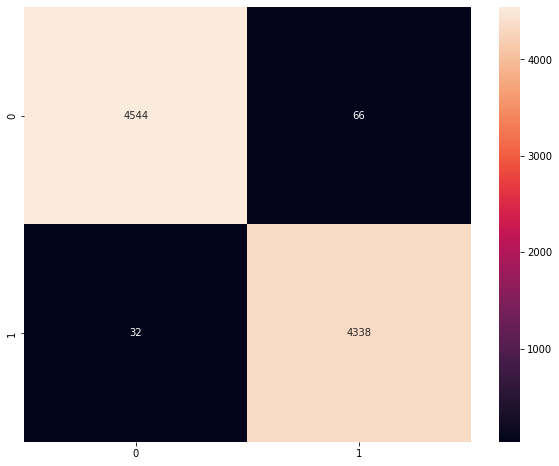

In [ ]:
import seaborn as sns
_,ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='g');